# **Описание проекта**

Для того чтобы отслеживать, как выглядит путь клиента от знакомства с продуктом до его получения, и какие в нем есть проблемные места, аналитики часто строят воронки. Этот инструмент позволяет понять, сколько клиентов "теряется" на каждом из этапов процесса и сколько в итоге совершает целевое действие.

Перед вами схема данных проекта Тинькофф квест. Постройте воронку, которая показывала бы в динамике по неделям и месяцам, сколько клиентов посещает наш сайт, и какая доля из них регистрируется на нем \ подает заявку на игру \ по факту приходит на нее. Количество клиентов и конверсии необходимо изобразить на одном графике.

Какие выводы можно сделать исходя из построенной воронки, какие точки роста продукта вы видите?

Задание нужно выполнить в JupyterNotebook \ Google Colab.

Как выполнять задание:

*   Подключиться к базе данных с помощью Python в JupyterNotebook \ Google Colab 
*   Собрать датасет с необходимыми полями,
*   Посчитать конверсии и сделать визуализацию на Python.
*   Прикрепить файл с выполненным заданием

# **Открываем базу данных:**

In [ ]:
import psycopg2

con = psycopg2.connect(
  database="postgres", 
  user="student", 
  password="JvLda93aA", 
  host="158.160.52.106", 
  port="5432"
)

cur = con.cursor()
print("Database opened successfully")

Database opened successfully


# **Собираем данные по месяцам:**

In [ ]:
# считаем количество людей, зашли на сайт
months = [9, 10, 11, 12, 1]
month_step_1 = []
for i in range(len(months)):
  cur.execute("with table_1 as \
  ( \
  select client_rk, visit_dttm \
  from msu_analytics.client \
  where date_part('month', visit_dttm) = %s \
  ) \
  select count(*) \
  from table_1 \
  ", (months[i],))
  rows = cur.fetchall()
  for row in rows:  
    month_step_1.append(*row)
print(month_step_1)

[778, 843, 786, 805, 852]


In [ ]:
# количество людей, которые зарегистрировались
month_step_2 = []
for i in range(len(months)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  where date_part('month', visit_dttm) = %s \
	      and date_part('month', registration_dttm) = %s \
  ) \
  select count(*) \
  from table_1 \
  ", (months[i], months[i]))
  rows = cur.fetchall()
  for row in rows:  
    month_step_2.append(*row)
print(month_step_2)

[186, 215, 193, 193, 212]


In [ ]:
# количество людей, которые записались на игру 
# (если человек записался на несколько игр, считается только одна)
month_step_3 = []
for i in range(len(months)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm, application_dttm \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  left join msu_analytics.application c \
	  on b.account_rk = c.account_rk \
  left join msu_analytics.game d \
	  on c.game_rk = d.game_rk \
  where date_part('month', visit_dttm) = %s \
	      and date_part('month', registration_dttm) = %s \
	      and date_part('month', application_dttm) = %s \
  ), \
  table_2 as \
  ( \
	  select count(*) as cnt \
	  from table_1 \
	  group by client_rk \
  ) \
  select count(*) \
  from table_2 \
  ", (months[i], months[i], months[i]))
  rows = cur.fetchall()
  for row in rows:  
    month_step_3.append(*row)
print(month_step_3)    

[40, 51, 46, 48, 61]


In [ ]:
# количество людей, которые пришли на игру 
# (если человек пришёл на несколько игр, считается только одна)
month_step_4 = []
for i in range(len(months)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm, \
         application_dttm, game_dttm, game_flg \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  left join msu_analytics.application c \
	  on b.account_rk = c.account_rk \
  left join msu_analytics.game d \
	  on c.game_rk = d.game_rk \
  where date_part('month', visit_dttm) = %s \
	      and date_part('month', registration_dttm) = %s \
	      and date_part('month', application_dttm) = %s \
	      and date_part('month', game_dttm) = %s \
	      and game_flg = 1 \
  ), \
  table_2 as \
  ( \
	  select count(*) as cnt \
	  from table_1 \
	  group by client_rk \
  ) \
  select count(*) \
  from table_2 \
  ", (months[i], months[i], months[i], months[i]))
  rows = cur.fetchall()
  for row in rows:  
    month_step_4.append(*row)
print(month_step_4)    

[1, 10, 7, 5, 18]


# **Собираем данные по неделям:**

In [ ]:
weeks = [i for i in range(35, 53)] + [i for i in range(1, 5)]
week_step_1 = []
for i in range(len(weeks)):
  cur.execute("with table_1 as \
  ( \
  select client_rk, visit_dttm \
  from msu_analytics.client \
  where date_part('week', visit_dttm) = %s \
  ) \
  select count(*) \
  from table_1 \
  ", (weeks[i],))
  rows = cur.fetchall()
  for row in rows:  
    week_step_1.append(*row)
print(week_step_1)

[111, 184, 167, 181, 195, 204, 190, 171, 189, 197, 173, 179, 180, 177, 168, 196, 192, 192, 201, 205, 181, 182]


In [ ]:
# количество людей, которые зарегистрировались
week_step_2 = []
for i in range(len(weeks)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  where date_part('week', visit_dttm) = %s \
	      and date_part('week', registration_dttm) = %s \
  ) \
  select count(*) \
  from table_1 \
  ", (weeks[i], weeks[i]))
  rows = cur.fetchall()
  for row in rows:  
    week_step_2.append(*row)
print(week_step_2)

[22, 28, 39, 42, 53, 53, 41, 39, 46, 44, 40, 35, 48, 44, 43, 48, 42, 40, 49, 45, 40, 37]


In [ ]:
# количество людей, которые записались на игру 
# (если человек записался на несколько игр, считается только одна)
week_step_3 = []
for i in range(len(weeks)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm, application_dttm \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  left join msu_analytics.application c \
	  on b.account_rk = c.account_rk \
  left join msu_analytics.game d \
	  on c.game_rk = d.game_rk \
  where date_part('week', visit_dttm) = %s \
	      and date_part('week', registration_dttm) = %s \
	      and date_part('week', application_dttm) = %s \
  ), \
  table_2 as \
  ( \
	  select count(*) as cnt \
	  from table_1 \
	  group by client_rk \
  ) \
  select count(*) \
  from table_2 \
  ", (weeks[i], weeks[i], weeks[i]))
  rows = cur.fetchall()
  for row in rows:  
    week_step_3.append(*row)
print(week_step_3)    

[0, 2, 4, 5, 4, 7, 4, 3, 2, 3, 2, 4, 4, 1, 5, 5, 7, 1, 4, 6, 12, 11]


In [ ]:
# количество людей, которые пришли на игру 
# (если человек пришёл на несколько игр, считается только одна)
week_step_4 = []
for i in range(len(weeks)):
  cur.execute("with table_1 as \
  ( \
  select a.client_rk, visit_dttm, registration_dttm, \
         application_dttm, game_dttm, game_flg \
  from msu_analytics.client a \
  left join msu_analytics.account b \
	  on a.client_rk = b.client_rk \
  left join msu_analytics.application c \
	  on b.account_rk = c.account_rk \
  left join msu_analytics.game d \
	  on c.game_rk = d.game_rk \
  where date_part('week', visit_dttm) = %s \
	      and date_part('week', registration_dttm) = %s \
	      and date_part('week', application_dttm) = %s \
	      and date_part('week', game_dttm) = %s \
	      and game_flg = 1 \
  ), \
  table_2 as \
  ( \
	  select count(*) as cnt \
	  from table_1 \
	  group by client_rk \
  ) \
  select count(*) \
  from table_2 \
  ", (weeks[i], weeks[i], weeks[i], weeks[i]))
  rows = cur.fetchall()
  for row in rows:  
    week_step_4.append(*row)
print(week_step_4)  

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


# **Строим графики:**

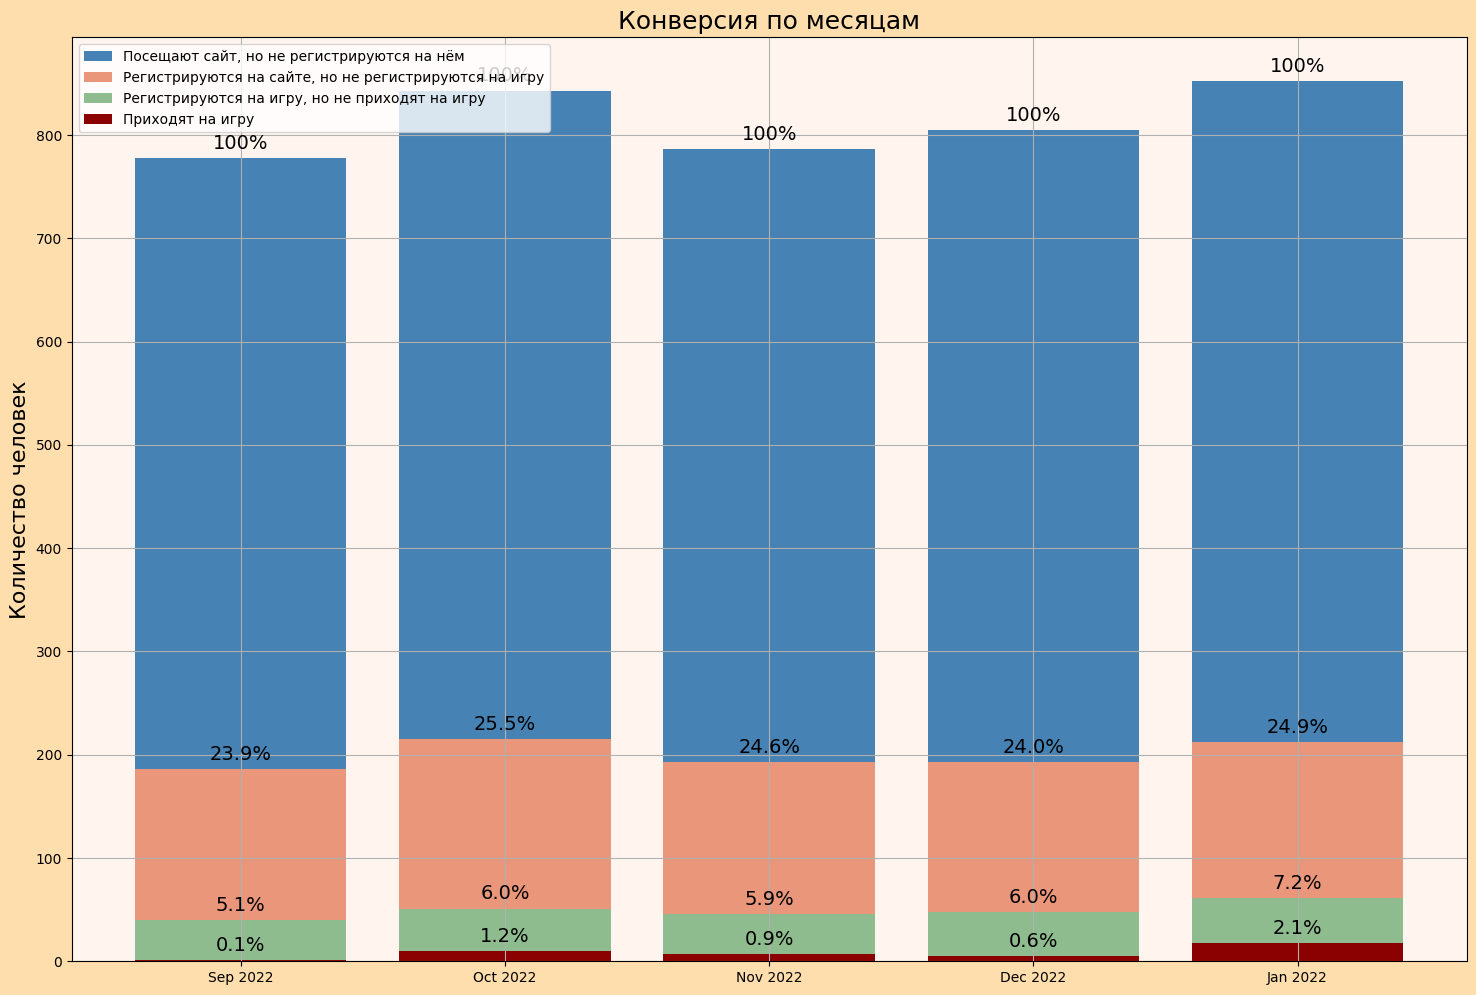

In [ ]:
import matplotlib.pyplot as plt

x = ('Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2022')
data_1 = month_step_1
data_2 = month_step_2
data_3 = month_step_3
data_4 = month_step_4

fig, ax = plt.subplots()

plot_1 = ax.bar(x, data_1, color = 'steelblue')
plot_2 = ax.bar(x, data_2, bottom = 0, color = 'darksalmon')
plot_3 = ax.bar(x, data_3, bottom = 0, color = 'darkseagreen')
plot_4 = ax.bar(x, data_4, bottom = 0, color = 'darkred') 
plt.legend((plot_1, plot_2, plot_3, plot_4), 
           ('Посещают сайт, но не регистрируются на нём', 
            'Регистрируются на сайте, но не регистрируются на игру', 
            'Регистрируются на игру, но не приходят на игру', 
            'Приходят на игру'))

fig.set_figwidth(18)    
fig.set_figheight(12)    
fig.set_facecolor('navajowhite')
ax.set_facecolor('seashell')

spisok_1, spisok_2, spisok_3 = [], [], []
for i in range(len(month_step_1)):
  spisok_1.append('{:.1%}'.format(month_step_2[i] / month_step_1[i]))
  spisok_2.append('{:.1%}'.format(month_step_3[i] / month_step_1[i]))
  spisok_3.append('{:.1%}'.format(month_step_4[i] / month_step_1[i]))


rects = ax.patches
labels = ['100%']*5 + spisok_1 + spisok_2 + spisok_3
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, 
        ha="center", va="bottom", size = 14
    )

plt.title('Конверсия по месяцам', fontsize=18)
plt.ylabel('Количество человек', fontsize=16)
plt.grid(True)
plt.show()

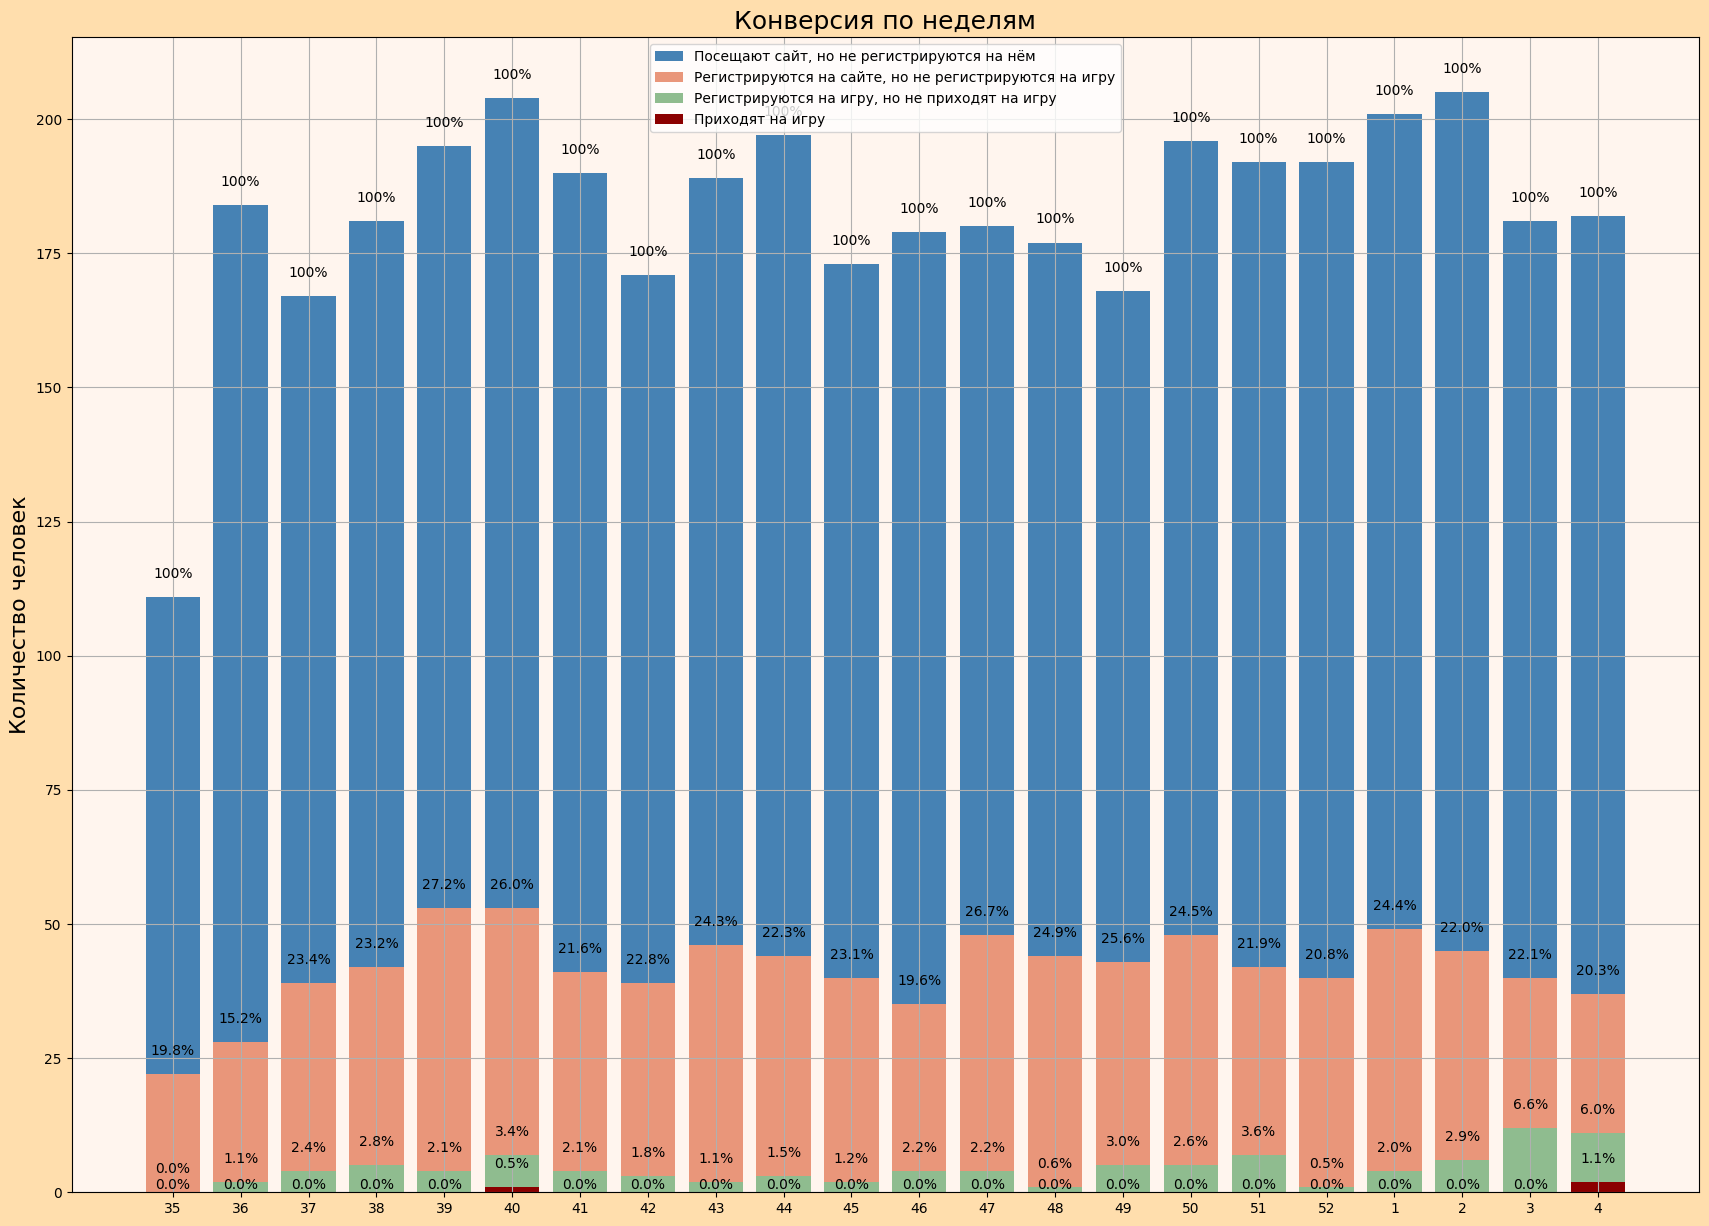

In [ ]:
x = tuple(map(str, weeks))
data_1 = week_step_1
data_2 = week_step_2
data_3 = week_step_3
data_4 = week_step_4

fig, ax = plt.subplots()

plot_1 = ax.bar(x, data_1, color = 'steelblue')
plot_2 = ax.bar(x, data_2, bottom = 0, color = 'darksalmon')
plot_3 = ax.bar(x, data_3, bottom = 0, color = 'darkseagreen')
plot_4 = ax.bar(x, data_4, bottom = 0, color = 'darkred') 
plt.legend((plot_1, plot_2, plot_3, plot_4), 
           ('Посещают сайт, но не регистрируются на нём', 
            'Регистрируются на сайте, но не регистрируются на игру', 
            'Регистрируются на игру, но не приходят на игру', 
            'Приходят на игру'))

fig.set_figwidth(21)    
fig.set_figheight(15)   
fig.set_facecolor('navajowhite')
ax.set_facecolor('seashell')

spisok_1, spisok_2, spisok_3 = [], [], []
f2 = lambda a, b: 0 if b == 0 else a / b
for i in range(len(week_step_1)):
  #value_3 = f2(week_step_4[i], week_step_1[i])
  spisok_1.append('{:.1%}'.format(week_step_2[i] / week_step_1[i]))
  spisok_2.append('{:.1%}'.format(week_step_3[i] / week_step_1[i]))
  spisok_3.append('{:.1%}'.format(f2(week_step_4[i], week_step_1[i])))

rects = ax.patches
labels = ['100%']*len(weeks) + spisok_1 + spisok_2 + spisok_3
i = 0
for rect, label in zip(rects, labels):
  height = rect.get_height()
  i += 1
  if (i > 3 * len(weeks)) and (label == '0.0%'):
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
  else:
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )

plt.title('Конверсия по неделям', fontsize=18)
plt.ylabel('Количество человек', fontsize=16)
plt.grid(True)
plt.show()

# **Выводы**



Последний месяц и последняя неделя на графиках не рассматриваются, так как недостаточно данных для анализа (в феврале данные по 2 дням, на пятой неделе данные по 4 дням).

Выводы, исходя из воронок.

---

По месяцам:
  1.  С ноября по январь наблюдается рост количества посещений сайта.
  2.  Конверсия регистрации на сайте и регистрации на игру не меняется на протяжении всех рассматриваемых месяцев — в среднем 24.6% и 6.0% соответственно.
  3.  С октября по декабрь снижается конверсия целевого действия и резко увеличивается в январе, обгоняя конверсию за октябрь на 0.9 процентных пунктов.

---

По неделям:
  1.  Конверсия приходящих на игру клиентов в течение недели почти всегда равна 0%, людям нужен больший промежуток времени для целевого действия. 
  2.  Увеличивается количество посещений сайта в 1 и 2 неделю (то есть после Нового года)

---

Точки роста продукта:
  1. Акции / специальные новогодние квесты для привлечения посетителей в новогодние праздники.
  2. Сокращение времени, которое требуется сделать клиенту для совершения целевого действия. Например, за счёт скидки на игру, которая проходит на этой же неделе.

In [ ]:
!jupyter nbconvert --to html /content/проект_1_продуктовая_аналитика.ipynb

[NbConvertApp] Converting notebook /content/проект_1_продуктовая_аналитика.ipynb to html
[NbConvertApp] Writing 889499 bytes to /content/проект_1_продуктовая_аналитика.html
